In [1]:
import pathlib
import cdmetadl.helpers.general_helpers
import cdmetadl.dataset
import cdmetadl.samplers
import cdmetadl.augmentation
from cdmetadl.notebooks.helpers import generate_edge_map_plot
import os
import plotly.io as pio
from PIL import Image
import matplotlib.pyplot as plt
from IPython.display import display

%load_ext autoreload
%autoreload 2
%matplotlib inline  

/fastdata/vilab25/cd-metadl-cyLvmR8c-py3.11/lib/python3.11/site-packages/controlnet_aux/mediapipe_face/mediapipe_face_common.py:7: UserWarning: The module 'mediapipe' is not installed. The package will have limited functionality. Please install it using the command: pip install 'mediapipe'
  warnings.warn(
/fastdata/vilab25/cd-metadl-cyLvmR8c-py3.11/lib/python3.11/site-packages/controlnet_aux/segment_anything/modeling/tiny_vit_sam.py:654: UserWarning: Overwriting tiny_vit_5m_224 in registry with controlnet_aux.segment_anything.modeling.tiny_vit_sam.tiny_vit_5m_224. This is because the name being registered conflicts with an existing name. Please check if this is not expected.
  return register_model(fn_wrapper)
/fastdata/vilab25/cd-metadl-cyLvmR8c-py3.11/lib/python3.11/site-packages/controlnet_aux/segment_anything/modeling/tiny_vit_sam.py:654: UserWarning: Overwriting tiny_vit_11m_224 in registry with controlnet_aux.segment_anything.modeling.tiny_vit_sam.tiny_vit_11m_224. This is becau

In [2]:
path_to_dataset = "/fastdata/vilab24/meta-album/"

dataset_path = pathlib.Path(path_to_dataset)
dataset_info_dict = cdmetadl.helpers.general_helpers.check_datasets(dataset_path, ["DOG"])

dataset = cdmetadl.dataset.ImageDataset("Dogs", dataset_info_dict["DOG"])

n_way_sampler = cdmetadl.samplers.ValueSampler(value=10)
k_shot_sampler = cdmetadl.samplers.ValueSampler(value=4)

task = dataset.generate_task(n_way_sampler, k_shot_sampler, query_size=4)

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

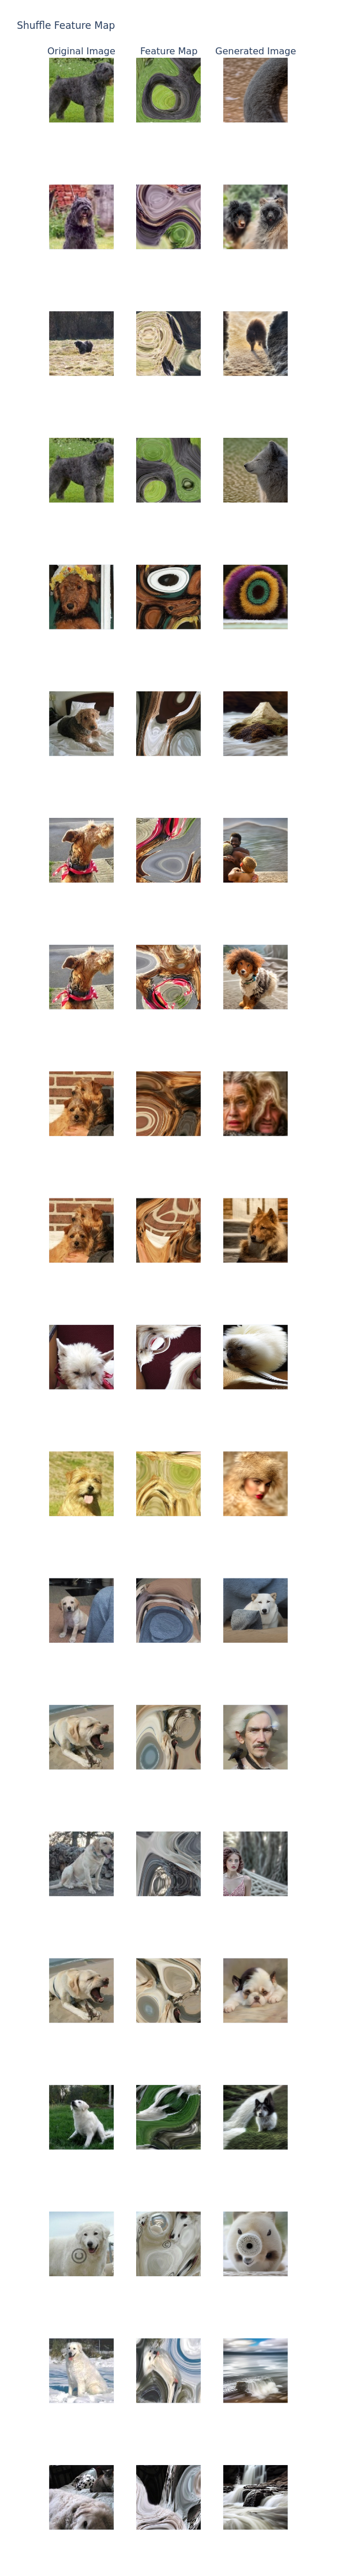

In [3]:
generative_augmentor = cdmetadl.augmentation.GenerativeAugmentation(threshold=0.75, scale=1,
                                                                    annotator_type="shuffle",
                                                                    keep_original_data=False,
                                                                    cache_images=True,
                                                                    batch=False)
generate_edge_map_plot(generative_augmentor, task, "Shuffle Feature Map")

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

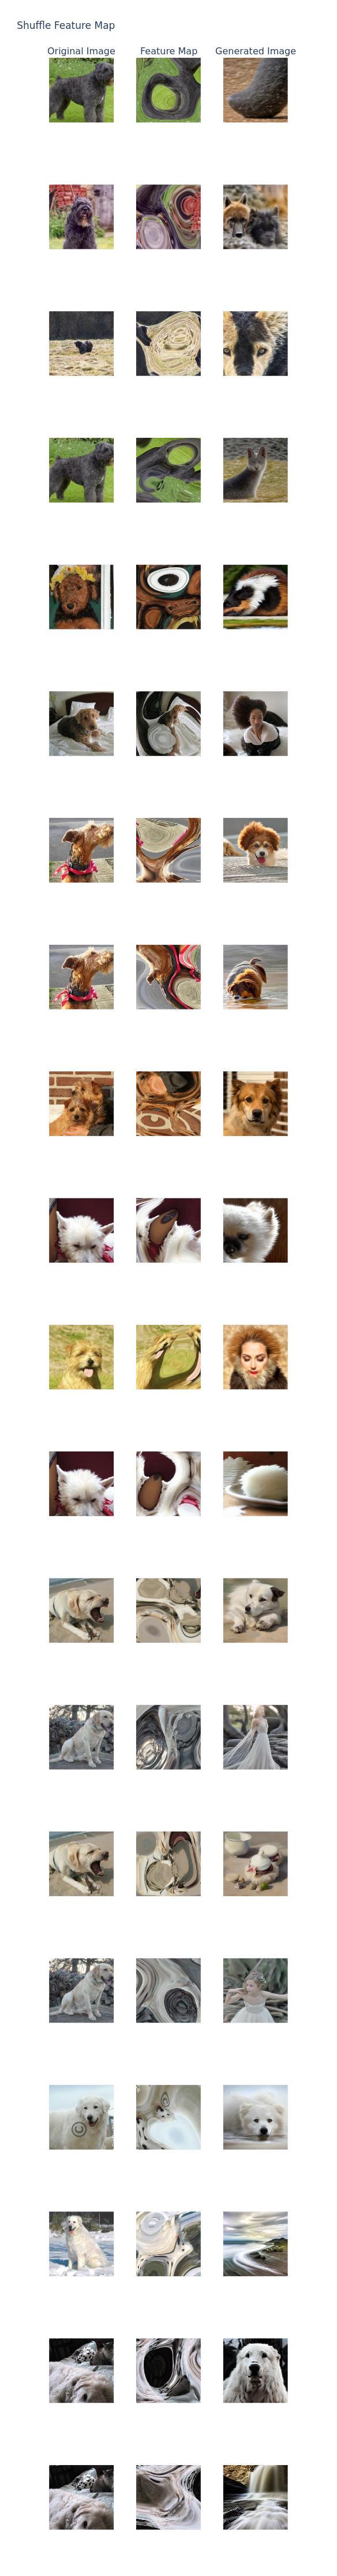

In [4]:
generative_augmentor = cdmetadl.augmentation.GenerativeAugmentation(threshold=0.75, scale=1,
                                                                    annotator_type="shuffle",
                                                                    keep_original_data=False,
                                                                    cache_images=True,
                                                                    batch=True)
generate_edge_map_plot(generative_augmentor, task, "Shuffle Feature Map")